In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Edge Detection for 2D Image

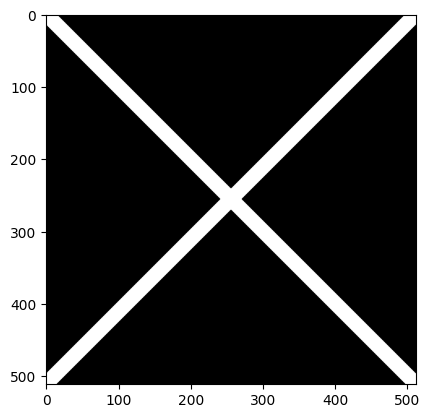

In [2]:
image_height,image_width = 512, 512
sample = np.zeros( (image_height,image_width))

for i in range(image_height):
    for j in range(image_width):
        if abs(i-j)<15:
            sample[image_height-i-1, j] = 255
            sample[i,j] = 255
            
plt.imshow(sample, cmap='gray')

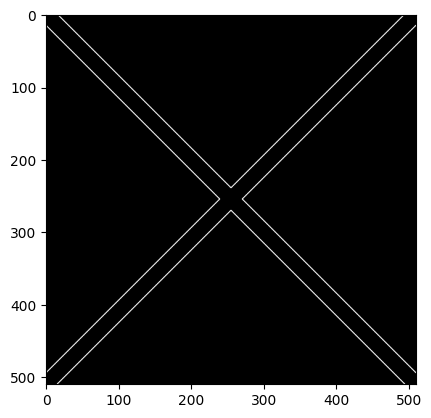

In [3]:
filter = np.array([[1, 0, 1], [0, -4, 0], [1, 0, 1]])

image_height, image_width = sample.shape
output = np.zeros((image_height - 2, image_width - 2))

for i in range(1, image_height - 1):
    for j in range(1, image_width - 1):
            region = sample[i - 1:i + 2, j - 1:j + 2]
            if np.sum(region * filter) >0:
                output[i - 1, j - 1] = 1.0
            else:
                output[i - 1, j - 1] = 0.0

plt.imshow(output, cmap='gray')

### Edge Detection for 3D image

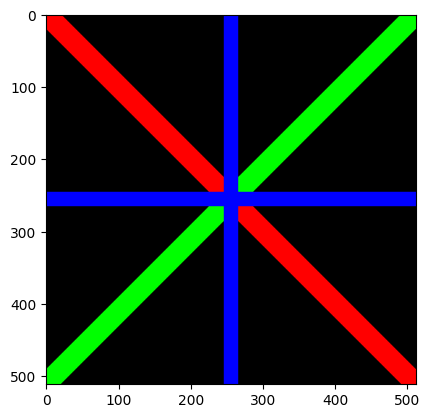

In [4]:
image_height,image_width,channel = 512, 512, 3
created_image = np.zeros( (image_height,image_width,channel), dtype=np.uint8)

for i in range(image_height):
    for j in range(image_width):
        if abs(i-j)<=20:
            created_image[i, j] = [255, 0, 0]
            created_image[246:266,:]= [0, 0, 255]
            created_image[:,246:266]= [0, 0, 255]
            created_image[512-i-1, j] = [0, 255, 0]
            
plt.imshow(created_image)

In [5]:
filter = np.array([[-1, 0, -1], [0, 4, 0], [-1, 0, -1]])

image_height, image_width, channels = created_image.shape

output = np.zeros((image_height - 2, image_width - 2, channels), dtype=created_image.dtype)

for i in range(1, image_height - 1):
    for j in range(1, image_width - 1):
        for c in range(channels):
            region = created_image[i - 1:i + 2, j - 1:j + 2, c]
            if np.sum(region * filter)>0:
                output[i - 1, j - 1, c] = 255
            else:
                output[i - 1, j - 1, c] = 0

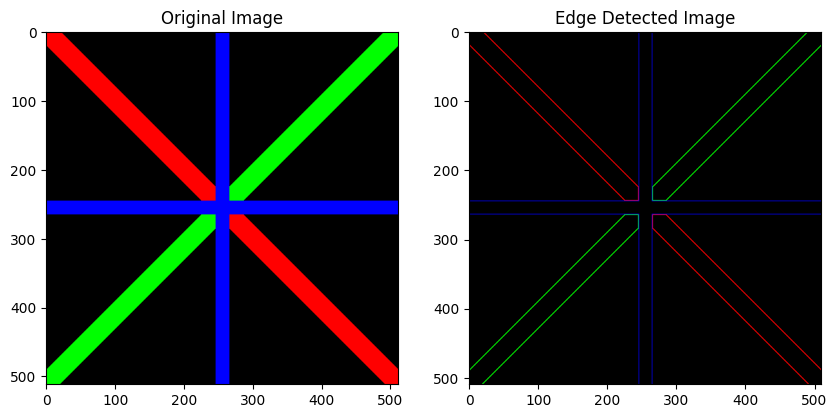

In [6]:
fig = plt.figure(figsize=(10, 15)) 
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(created_image)
plt.subplot(1,2,2)
plt.imshow(output)
plt.title('Edge Detected Image')
plt.show()

### sequentially applying [filters + maxpooling]

In [33]:
def filter_operation(sample, filter, pad=1):
    # Get image dimensions
    image_height, image_width, channels = sample.shape
    
    # Get filter dimensions
    filter_height, filter_width = filter.shape
    
    # Calculate padding size
    pad_height, pad_width = pad, pad
    
    # Pad the image
    padded_sample = np.pad(sample, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant')
    
    # Initialize output
    output = np.zeros((image_height, image_width, channels), dtype=sample.dtype)

    # Apply filter operation
    for i in range(image_height):  # Adjusted from image_width to image_height
        for j in range(image_width):  # Adjusted from image_width to image_height
            for c in range(channels):
                # Extract region corresponding to the filter size
                region = padded_sample[i:i + filter_height, j:j + filter_width, c]
                
                # Perform the element-wise multiplication and sum the results
                output[i, j, c] = np.sum(region * filter)
                
    return output


In [34]:
def max_pool_operation(sample):

    image_height, image_width, channels = sample.shape
    
    output = np.zeros((image_height, image_width, channels), dtype=sample.dtype)
            
    for c in range(channels):
        for i in range(0, image_height-2):
            for j in range(0, image_width - 2):
                region = sample[i:i + 2, j:j + 2, c]
                output[i, j, c] = np.max(region)
    
    return output

In [35]:
filter_1 = np.array([[1, 0, 1],
                    [0, -4, 0],
                    [1, 0, 1]])

filter_2 = np.array([[-1, 0, -1],
                    [0, 4, 0],
                    [-1, 0, -1]])

filter_3 = np.array([[1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1]])

In [36]:
bull_image = plt.imread('Images/bull.jpeg')

In [37]:
filter_1_output = filter_operation(bull_image, filter_1)
max_pooled_1 = max_pool_operation(filter_1_output)

filter_2_output = filter_operation(max_pooled_1, filter_2)
max_pooled_2 = max_pool_operation(filter_2_output)

filter_3_output = filter_operation(max_pooled_2, filter_3)
max_pooled_3 = max_pool_operation(filter_3_output)

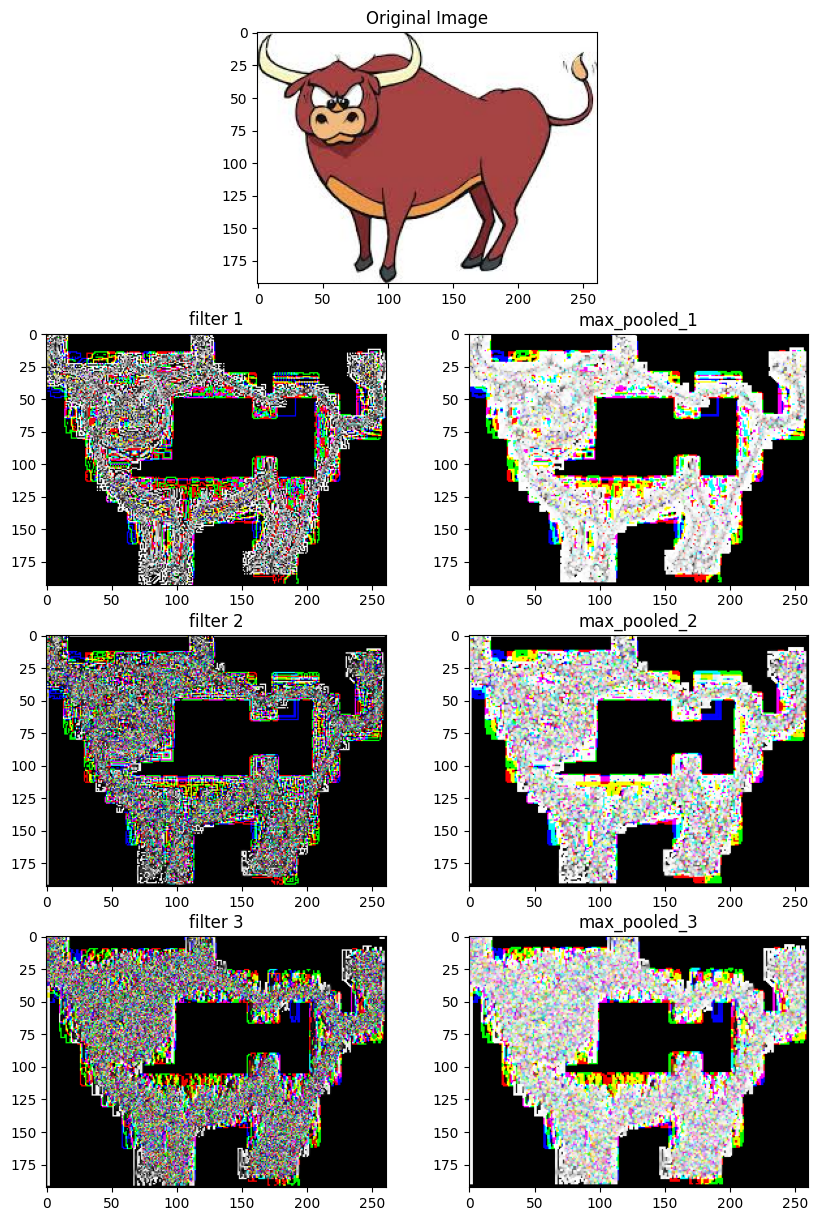

In [38]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 15)) 
gs = gridspec.GridSpec(4, 2, height_ratios=[1, 1, 1, 1]) 

ax1 = plt.subplot(gs[0, :])  # Original Image
ax1.set_title('Original Image')
ax1.imshow(bull_image)

ax2 = plt.subplot(gs[1, 0])  # Filter 1
ax2.set_title('filter 1')
ax2.imshow(filter_1_output)

ax3 = plt.subplot(gs[1, 1])  # Max Pooled 1
ax3.set_title('max_pooled_1')
ax3.imshow(max_pooled_1)

ax4 = plt.subplot(gs[2, 0])  # Filter 2
ax4.set_title('filter 2')
ax4.imshow(filter_2_output)

ax5 = plt.subplot(gs[2, 1])  # Max Pooled 2
ax5.set_title('max_pooled_2')
ax5.imshow(max_pooled_2)

ax6 = plt.subplot(gs[3, 0])  # Filter 3
ax6.set_title('filter 3')
ax6.imshow(filter_3_output)

ax7 = plt.subplot(gs[3, 1])  # Max Pooled 3
ax7.set_title('max_pooled_3')
ax7.imshow(max_pooled_3)

plt.show()

In [39]:
print(bull_image.shape)
print(max_pooled_3.shape)

(193, 261, 3)
(193, 261, 3)


### Applying filters and maxpooling parallelly

In [40]:
def median_filter_operation(sample):

    image_height, image_width, channels = sample.shape
    
    output = np.zeros((image_height, image_width, channels), dtype=sample.dtype)
            
    for c in range(channels):
        for i in range(0, image_height-2):
            for j in range(0, image_width - 2):
                region = sample[i :i +2, j:j + 2, c]
                output[i - 1, j - 1, c] = np.median(region)
    
    return output

In [41]:
def combine_filter(images):
    image_height, image_width, channels = images[0].shape
    
    output = np.zeros((image_height , image_width , channels), dtype=images[0].dtype)
            
    for c in range(channels):
        for i in range(image_height):
            for j in range(image_width):
                    output[i, j, c] = np.mean([image[i, j, c] for image in images])

    return output

In [42]:
filter_1 = np.array([[1, 0, 1], [0, -4, 0], [1, 0, 1]])
filter_2 = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])

l1_filter_1_output = filter_operation(bull_image, filter_1)
l1_filter_2_output = filter_operation(bull_image, filter_2)
l1_filter_3_output = median_filter_operation(bull_image)
l1_max_pooled_1 = max_pool_operation(l1_filter_1_output)
l1_max_pooled_2 = max_pool_operation(l1_filter_2_output)
l1_max_pooled_3 = max_pool_operation(l1_filter_3_output)


l2_filter_1_output = filter_operation(l1_max_pooled_1, filter_1)
l2_filter_2_output = filter_operation(l1_max_pooled_2, filter_2)
l2_filter_3_output = median_filter_operation(l1_max_pooled_3)
l2_max_pooled_1 = max_pool_operation(l2_filter_1_output)
l2_max_pooled_2 = max_pool_operation(l2_filter_2_output)
l2_max_pooled_3 = max_pool_operation(l2_filter_3_output)

l3_filter_1_output = filter_operation(l2_max_pooled_1, filter_1)
l3_filter_2_output = filter_operation(l2_max_pooled_2, filter_2)
l3_filter_3_output = median_filter_operation(l2_max_pooled_3)
l3_max_pooled_1 = max_pool_operation(l3_filter_1_output)
l3_max_pooled_2 = max_pool_operation(l3_filter_2_output)
l3_max_pooled_3 = max_pool_operation(l3_filter_3_output)

In [43]:
print([x.shape for x in [l3_max_pooled_1, l3_max_pooled_2, l3_max_pooled_3]])
final_image =combine_filter([l3_max_pooled_1, l3_max_pooled_2, l3_max_pooled_3])

[(193, 261, 3), (193, 261, 3), (193, 261, 3)]


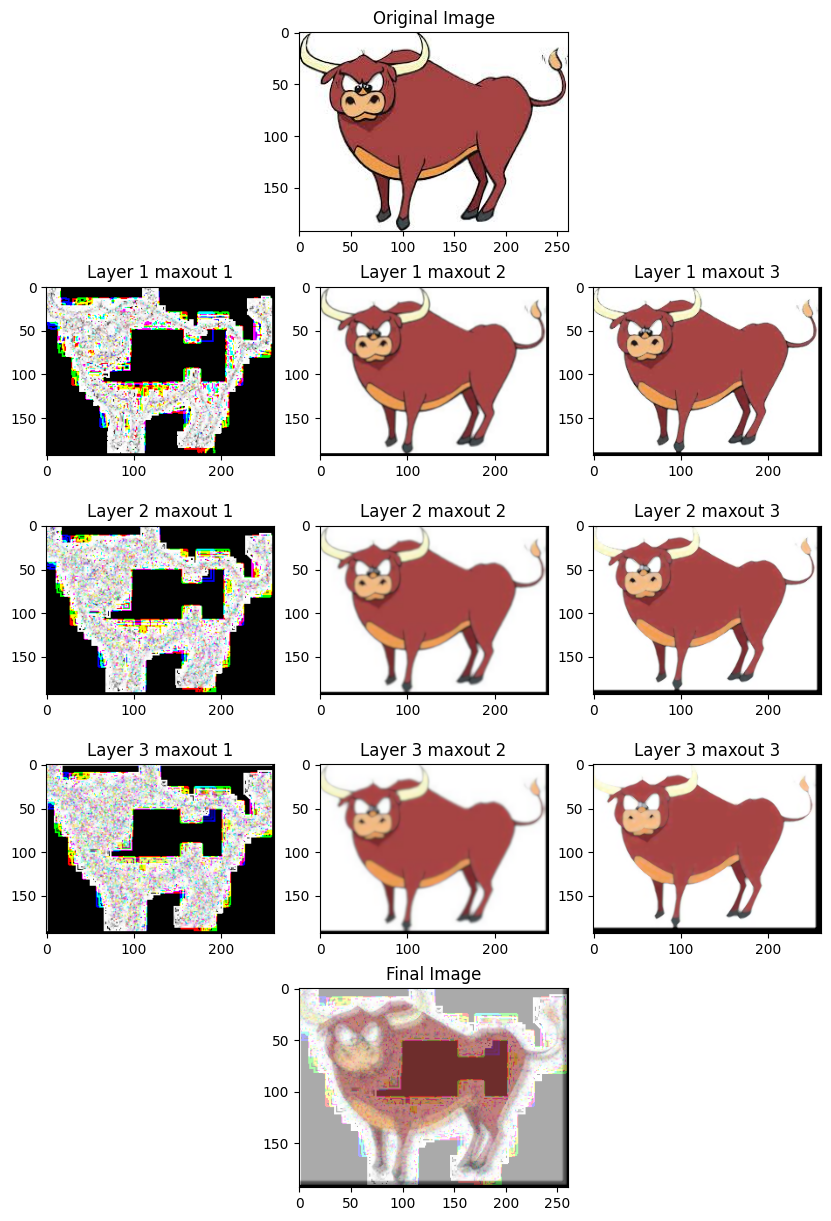

In [44]:
fig = plt.figure(figsize=(10, 15)) 
gs = gridspec.GridSpec(5, 3, height_ratios=[1, 1, 1, 1, 1]) 

ax1 = plt.subplot(gs[0, :])  # Original Image
ax1.set_title('Original Image')
ax1.imshow(bull_image)

ax2 = plt.subplot(gs[1, 0])  # Filter 1
ax2.set_title('Layer 1 maxout 1')
ax2.imshow(l1_max_pooled_1)

ax3 = plt.subplot(gs[1, 1])  # Max Pooled 1
ax3.set_title('Layer 1 maxout 2')
ax3.imshow(l1_max_pooled_2)

ax4 = plt.subplot(gs[1, 2])  # Max Pooled 1
ax4.set_title('Layer 1 maxout 3')
ax4.imshow(l1_max_pooled_3)

ax5 = plt.subplot(gs[2, 0])  # Filter 1
ax5.set_title('Layer 2 maxout 1')
ax5.imshow(l2_max_pooled_1)

ax6 = plt.subplot(gs[2, 1])  # Max Pooled 1
ax6.set_title('Layer 2 maxout 2')
ax6.imshow(l2_max_pooled_2)

ax7 = plt.subplot(gs[2, 2])  # Max Pooled 1
ax7.set_title('Layer 2 maxout 3')
ax7.imshow(l2_max_pooled_3)

ax8 = plt.subplot(gs[3, 0])  # Filter 1
ax8.set_title('Layer 3 maxout 1')
ax8.imshow(l3_max_pooled_1)

ax9 = plt.subplot(gs[3, 1])  # Max Pooled 1
ax9.set_title('Layer 3 maxout 2')
ax9.imshow(l3_max_pooled_2)

ax10 = plt.subplot(gs[3, 2])  # Max Pooled 1
ax10.set_title('Layer 3 maxout 3')
ax10.imshow(l3_max_pooled_3)

ax11 = plt.subplot(gs[4,:])  # Max Pooled 1
ax11.set_title('Final Image')
ax11.imshow(final_image)

plt.show()

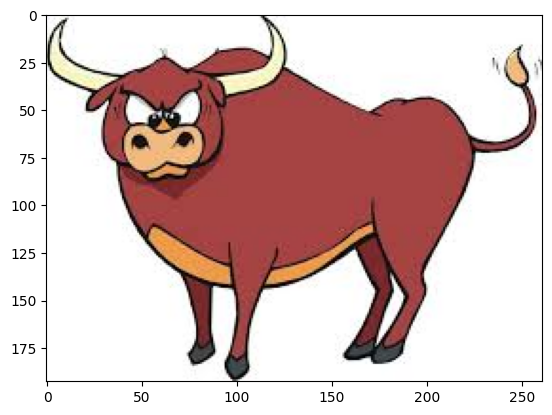

In [45]:
plt.imshow(bull_image[:,:,:3])